# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
latitudes = []
longitudes = []
Max_temp = []
Humidities = []
Clouds = []
Wind_speed = []
Country = []
Date = []
Cities_New = []

    # Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

for city in cities:
    try:
        weather_response = requests.get(f"{url}appid={weather_api_key}&q={city}&units={units}").json()
        latitudes.append(weather_response['coord']['lat'])
        longitudes.append(weather_response["coord"]["lon"])
        Max_temp.append(weather_response["main"]["temp_max"])
        Humidities.append(weather_response["main"]["humidity"])
        Clouds.append(weather_response["clouds"]["all"])
        Wind_speed.append(weather_response["wind"]["speed"])
        Country.append(weather_response["sys"]["country"])
        Date.append(weather_response["dt"])
        Cities_New.append(weather_response["name"])
        print(f"City {city} found...")
    except KeyError:
        print("City not found. Skipping...")
        
    
print("----------------Request Complete----------------")


City nikolskoye found...
City avarua found...
City llanes found...
City yellowknife found...
City luderitz found...
City hobart found...
City busselton found...
City parkes found...
City port alfred found...
City bredasdorp found...
City fortuna found...
City port lincoln found...
City not found. Skipping...
City terney found...
City saskylakh found...
City ust-tsilma found...
City qingyuan found...
City butaritari found...
City ushuaia found...
City severo-kurilsk found...
City rikitea found...
City la reforma found...
City saint george found...
City kiruna found...
City tautira found...
City kahului found...
City kubrat found...
City mataura found...
City not found. Skipping...
City kodiak found...
City ipameri found...
City payo found...
City nanortalik found...
City la ronge found...
City upernavik found...
City lasa found...
City miami found...
City kaitangata found...
City kapit found...
City palmer found...
City mar del plata found...
City saquena found...
City nome found...
Cit

City banjar found...
City sosua found...
City ridgecrest found...
City dera bugti found...
City rio grande found...
City not found. Skipping...
City bukachacha found...
City ouango found...
City lubbock found...
City not found. Skipping...
City lima duarte found...
City tiznit found...
City gonbad-e qabus found...
City saurimo found...
City santiago found...
City te anau found...
City roald found...
City dingle found...
City sioux lookout found...
City inirida found...
City jardim found...
City skjervoy found...
City urucara found...
City santa isabel found...
City leh found...
City goderich found...
City bam found...
City san jose found...
City ossora found...
City abha found...
City havelock found...
City teahupoo found...
City hasaki found...
City kambove found...
City namatanai found...
City itarema found...
City salumbar found...
City vereshchagino found...
City matara found...
City deputatskiy found...
City naryan-mar found...
City honningsvag found...
City santa cruz del norte f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
Cities_data = [Cities_New,Clouds,Country,Date,Humidities,latitudes,longitudes,Max_temp,Wind_speed]

Cities_data = pd.DataFrame(
    {'City': Cities_New,
     'Cloudiness': Clouds,
     'Country': Country,
     'Date': Date,
     'Humidity': Humidities,
     'Latitude': latitudes,
     'Longitude': longitudes,
     'Max Temp': Max_temp,
     'Wind Speed': Wind_speed,
    })

Cities_data.to_csv ('City_Data.csv',index = True, header=True)
Cities_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Nikolskoye,75,RU,1619473373,70,59.7035,30.7861,6.00,3.00
1,Avarua,45,CK,1619473373,78,-21.2078,-159.7750,27.00,2.06
2,Llanes,100,ES,1619473374,97,43.4198,-4.7549,15.00,0.89
3,Yellowknife,40,CA,1619473242,52,62.4560,-114.3525,-12.22,6.17
4,Lüderitz,81,NA,1619473374,87,-26.6481,15.1594,16.06,3.17


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
Humidity_100 = Cities_data.loc[Cities_data['Humidity']>=100]
Humidity_100

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
33,Laas,90,IT,1619473380,100,46.6166,10.7002,12.22,2.57
53,Punta Arenas,75,CL,1619473306,100,-53.1500,-70.9167,7.00,3.60
65,Clyde River,90,CA,1619473387,100,70.4692,-68.5914,-4.00,1.03
113,Huangpi,91,CN,1619473397,100,30.8845,114.3779,15.00,1.00
115,Phang Nga,75,TH,1619473398,100,8.4509,98.5298,28.33,0.51
178,Nuuk,90,GL,1619473382,100,64.1835,-51.7216,2.00,3.09
195,Kabin Buri,100,TH,1619473415,100,13.9511,101.7177,28.33,0.39
256,Beisfjord,40,NO,1619473429,100,68.3751,17.5988,-1.00,3.09
261,Manaus,75,BR,1619473341,100,-3.1019,-60.0250,23.00,1.03
262,Cap-aux-Meules,100,CA,1619473430,100,47.3821,-61.8597,5.00,3.60


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = Cities_data.drop(Cities_data[Cities_data['Humidity'] > 99].index, inplace = False)
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Nikolskoye,75,RU,1619473373,70,59.7035,30.7861,6.00,3.00
1,Avarua,45,CK,1619473373,78,-21.2078,-159.7750,27.00,2.06
2,Llanes,100,ES,1619473374,97,43.4198,-4.7549,15.00,0.89
3,Yellowknife,40,CA,1619473242,52,62.4560,-114.3525,-12.22,6.17
4,Lüderitz,81,NA,1619473374,87,-26.6481,15.1594,16.06,3.17
...,...,...,...,...,...,...,...,...,...
563,Atikokan,100,CA,1619473495,85,48.7555,-91.6216,1.36,3.90
564,Houlton,90,US,1619473496,81,46.1262,-67.8403,4.00,6.17
565,Malaryta,28,BY,1619473496,79,51.7905,24.0740,-0.86,2.55
566,Lengshuitan,100,CN,1619473496,96,26.4111,111.5956,15.54,1.21


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

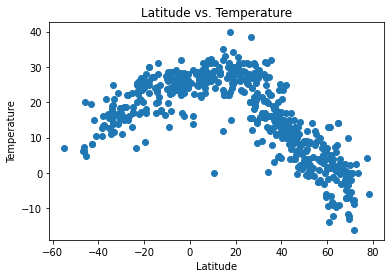

In [25]:
fig = plt.figure()

plt.scatter(clean_city_data['Latitude'],clean_city_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')
plt.show()

fig.savefig('Images/LatvsTemp.png')

The above code creates a scatter plot of the temperatures of cities across a random set of latitudes across the globe.Specifically it plots the latitudes along the x-axis and the temperatures along the y-axis. It also assigns labels to the y and x axis and gives the plot a title of "Latitude vs. Temperature".

The plot tells us the cities closest to the poles tend to have lower temperatures, and cities closest to the equater have the highest temperatures. They have a strong non-linear relationship.

## Latitude vs. Humidity Plot

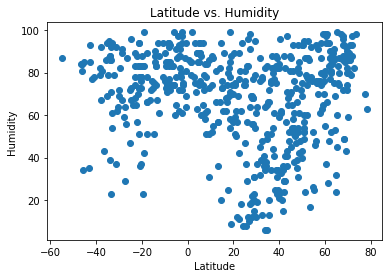

In [26]:
fig = plt.figure()

plt.scatter(clean_city_data['Latitude'],clean_city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.show()

fig.savefig('Images/LatvsHum.png')

The above code creates a scatter plot of the humidity rates of cities across a random set of latitudes across the globe.Specifically it plots the latitudes along the x-axis and the humidity along the y-axis. It also assigns labels to the y and x axis and gives the plot a title of "Latitude vs. Humidity".

The plot tells us there is a weak non-linear relationship between latitude and humidity.

## Latitude vs. Cloudiness Plot

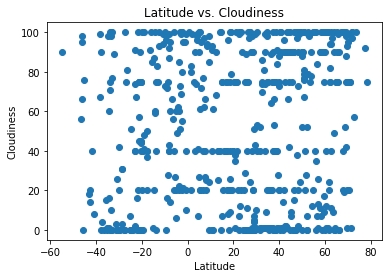

In [27]:
fig = plt.figure()

plt.scatter(clean_city_data['Latitude'],clean_city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.show()

fig.savefig('Images/LatvsCloud.png')

The above code creates a scatter plot of the cloudiness of cities across a random set of latitudes across the globe.Specifically it plots the latitudes along the x-axis and the cloudiness along the y-axis. It also assigns labels to the y and x axis and gives the plot a title of "Latitude vs. Cloudiness".

The plot tells us there is no strong relationship between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

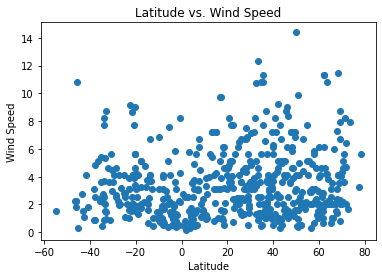

In [28]:
fig = plt.figure()

plt.scatter(clean_city_data['Latitude'],clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.show()

fig.savefig('Images/LatvsWind.png')

The above code creates a scatter plot of the wind speed of cities across a random set of latitudes across the globe.Specifically it plots the latitudes along the x-axis and the wind speed along the y-axis. It also assigns labels to the y and x axis and gives the plot a title of "Latitude vs. Wind Speeed".

The plot tells us there is a moderate, negative relationship between latitude and wind speed.

## Linear Regression

In [11]:
South_Hem = clean_city_data.drop(clean_city_data[clean_city_data['Latitude'] > 0].index, inplace = False)
South_Hem
North_Hem = clean_city_data.drop(clean_city_data[clean_city_data['Latitude'] < 0].index, inplace = False)
North_Hem

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Nikolskoye,75,RU,1619473373,70,59.7035,30.7861,6.00,3.00
2,Llanes,100,ES,1619473374,97,43.4198,-4.7549,15.00,0.89
3,Yellowknife,40,CA,1619473242,52,62.4560,-114.3525,-12.22,6.17
10,Fortuna,90,US,1619473375,62,40.5982,-124.1573,14.44,4.12
12,Terney,9,RU,1619473376,45,45.0503,136.6092,8.28,1.26
...,...,...,...,...,...,...,...,...,...
562,Māndal,0,IN,1619473495,8,25.4500,74.5667,26.86,1.55
563,Atikokan,100,CA,1619473495,85,48.7555,-91.6216,1.36,3.90
564,Houlton,90,US,1619473496,81,46.1262,-67.8403,4.00,6.17
565,Malaryta,28,BY,1619473496,79,51.7905,24.0740,-0.86,2.55


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

-0.86

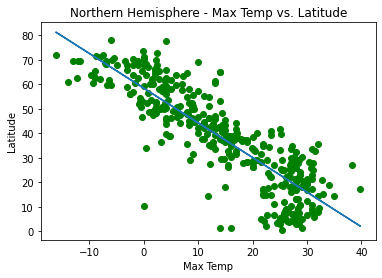

In [29]:
fig = plt.figure()

x_axis_value = North_Hem['Max Temp']
y_axis_value = North_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(North_Hem['Max Temp'],North_Hem['Latitude'],c="green")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

fig.savefig('Images/NorthTempvLat.png')

corcoe

The above plot shows us the relationship between max temperatures of cities along random latitudes across the northern hemisphere of the globe.

It tells us that as you get closer to the equater the temperature increases. There is a strong negative linear relationship.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0.72

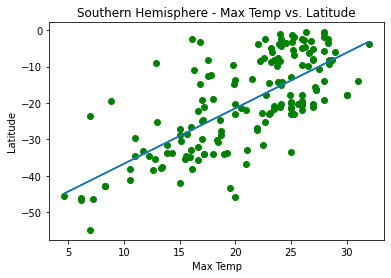

In [30]:
fig = plt.figure()

x_axis_value = South_Hem['Max Temp']
y_axis_value = South_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(South_Hem['Max Temp'],South_Hem['Latitude'],c="green")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

fig.savefig('Images/SouthTempvLat.png')

corcoe

The above plot shows us the relationship between max temperatures of cities along random latitudes across the southern hemisphere of the globe.

It tells us that as you get closer to the equater the temperature increases. There is a strong positive linear relationship.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.11

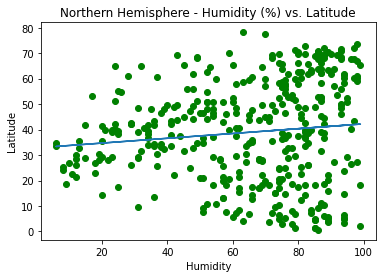

In [34]:
fig = plt.figure()

x_axis_value = North_Hem['Humidity']
y_axis_value = North_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(North_Hem['Humidity'],North_Hem['Latitude'],c="green")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

fig.savefig('Images/NorthHumvLat.png')

corcoe

The above plot shows us the relationship between humidity of cities along random latitudes across the northern hemisphere of the globe.

There is a weak non-linear relationship between latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.16

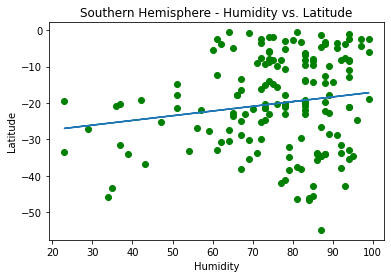

In [35]:
fig = plt.figure()

x_axis_value = South_Hem['Humidity']
y_axis_value = South_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(South_Hem['Humidity'],South_Hem['Latitude'],c="green")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

fig.savefig('Images/SouthHumvLat.png')

corcoe

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.1

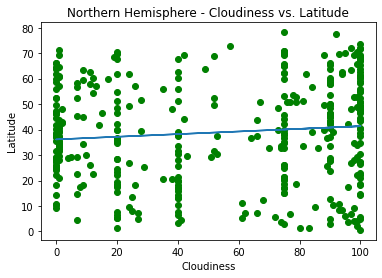

In [36]:
fig = plt.figure()

x_axis_value = North_Hem['Cloudiness']
y_axis_value = North_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(North_Hem['Cloudiness'],North_Hem['Latitude'],c="green")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

fig.savefig('Images/NorthCloudvLat.png')

corcoe

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.19

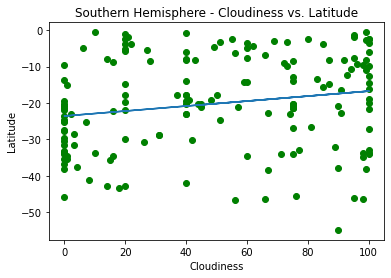

In [37]:
fig = plt.figure()

x_axis_value = South_Hem['Cloudiness']
y_axis_value = South_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(South_Hem['Cloudiness'],South_Hem['Latitude'],c="green")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

fig.savefig('Images/SouthCloudvLat.png')

corcoe

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.07

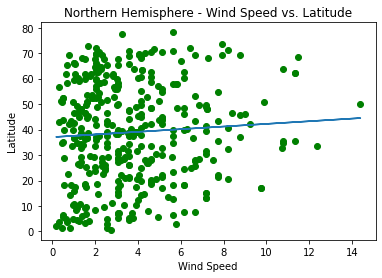

In [38]:
fig = plt.figure()

x_axis_value = North_Hem['Wind Speed']
y_axis_value = North_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(North_Hem['Wind Speed'],North_Hem['Latitude'],c="green")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

fig.savefig('Images/NorthWindvLat.png')

corcoe

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.15

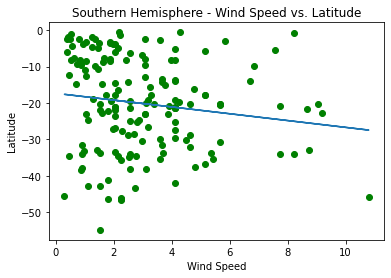

In [39]:
fig = plt.figure()

x_axis_value = South_Hem['Wind Speed']
y_axis_value = South_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

plt.scatter(South_Hem['Wind Speed'],South_Hem['Latitude'],c="green")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.plot(x_axis_value, m*x_axis_value + b)

fig.savefig('Images/SouthWindvLat.png')

corcoe